## 0. Checkout the data:

In [1]:
# Let's quickly read/open and checkout the data: 
words = open("names.txt", 'r').read().split() # or .splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

## 1. Building a Bigram Model:

In [6]:
for w in words[:3]: # let's just see it in the first 3 words:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2) 

e m
m m
m a
o l
l i
i v
v i
i a
a v
v a


In [7]:
# Now, let's add a starting and ending charatcters to each word, and also create the bigram dictionary:  

b = {} # the dictionary holding character tuples from the names 
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        # print(ch1, ch2)
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 # similar to: b[bigram] += 1

In [8]:
sorted(b.items(), key=lambda x: x[1], reverse=True)[:10] # or: instead of using reverse, we can use -x[1]
# also, only checking the top 10

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [9]:
# It's much more convinient to onvert the words from a dictionary to a 2D array:

import torch 

N = torch.zeros((28, 28), dtype=torch.int32) 
# int32 instead of torch's default float32 because we are just keeping the counts of character accourcences 
# 28: 26 English alphabet + 2 '<S>', '<E>' that we added ourselves to teh words dictionary 


# Now, let's create a look-up table (string:integer) for the cell below: 
chars = sorted(list(set(''.join(words)))) #set finds the unique characters in a string.
stoi = {s:i for i, s in enumerate(chars)} # string to integer 
stoi['<S>'] = stoi['z'] + 1
stoi['<E>'] = stoi['z'] + 2

In [10]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1 

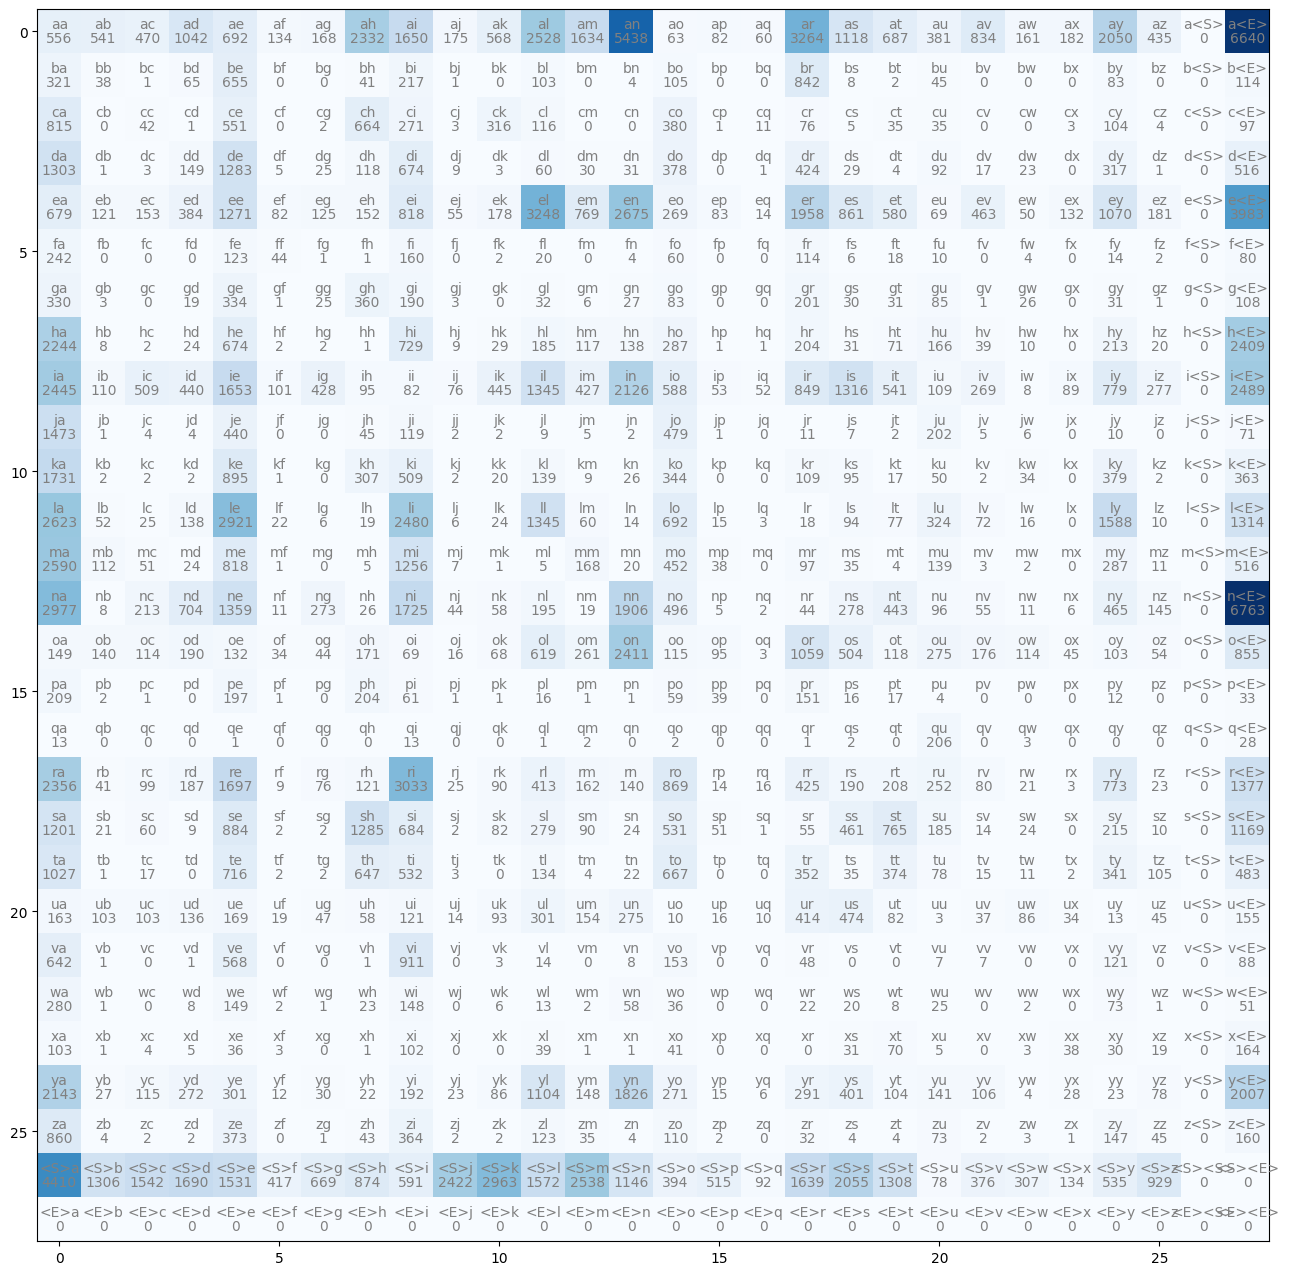

In [11]:
# Now, let's visualize N:

import matplotlib.pyplot as plt 
%matplotlib inline 

itos = {i:s for s,i in stoi.items()}

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28): 
        chstr = itos[i] + itos[j] # character string
        plt.text(j, i, chstr, ha="center", va="bottom", color="grey")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="grey")

plt.show()
# plt.axis('off');

In [12]:
# Now, since the last row of matrix is all zeros (aka. waste of space), and also the one row before the last looks a 
# bit jammed, we are gonna make it look nicer: 

N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set(''.join(words)))) 
stoi = {s:i+1 for i, s in enumerate(chars)} # string to integer 
stoi['.'] = 0

itos = {i:s for s,i in stoi.items()} # used for additives during plotting 

In [13]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1 

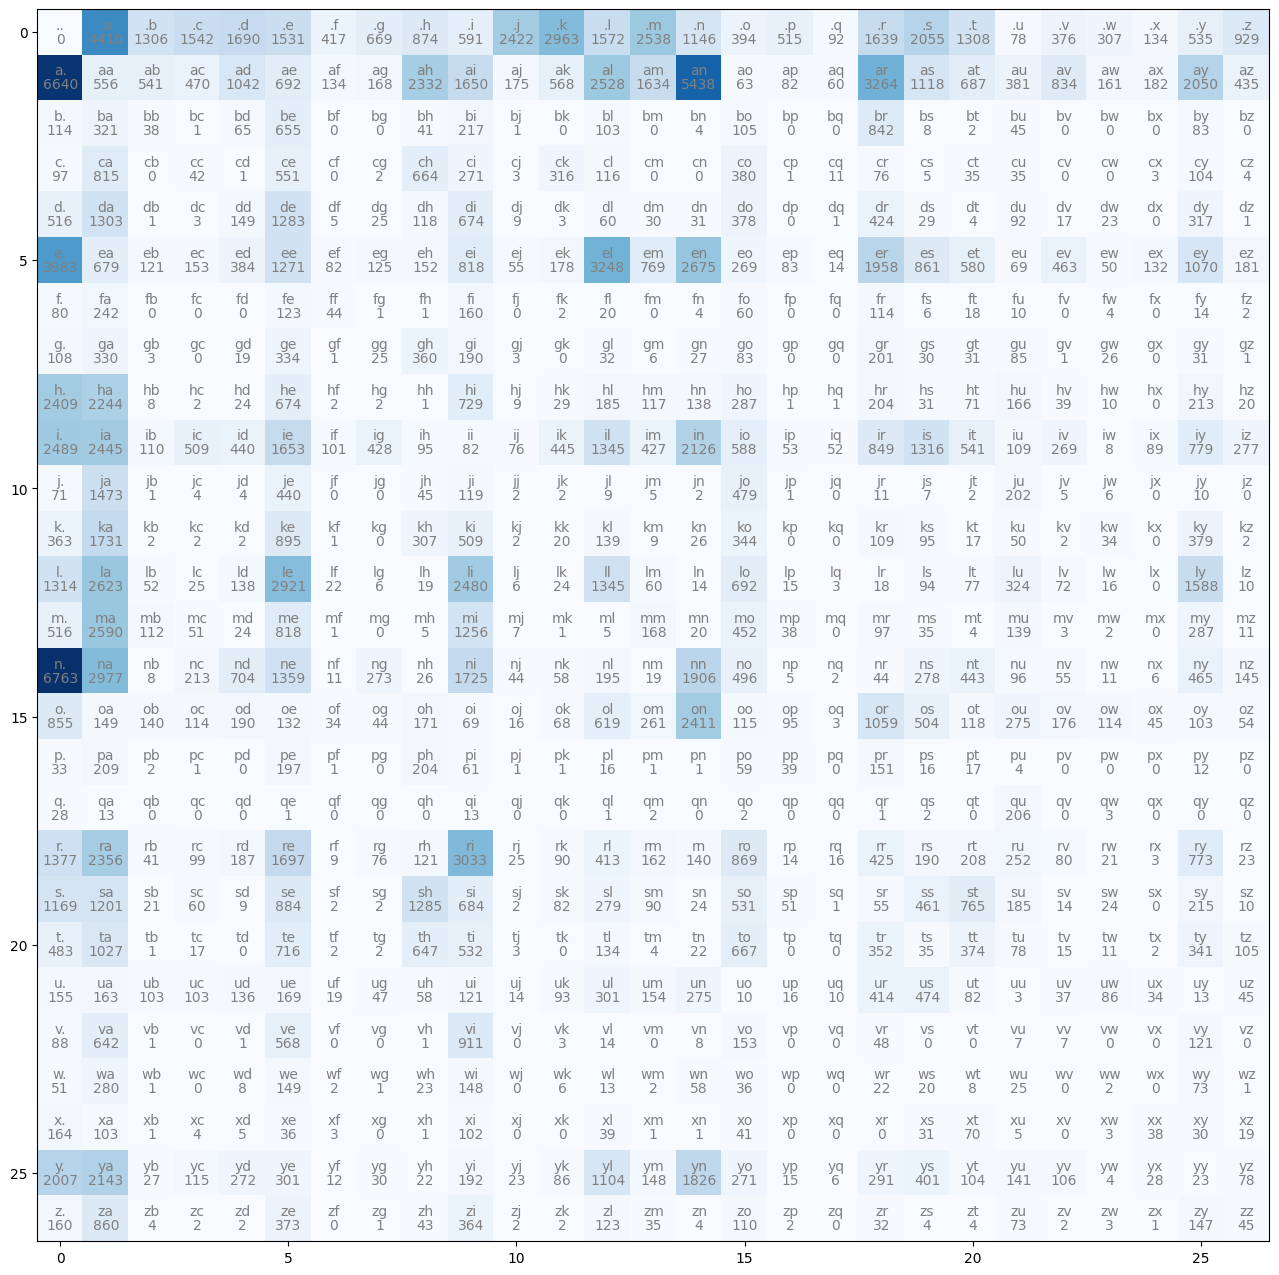

In [14]:
# Now, let's visualize N:

import matplotlib.pyplot as plt 
%matplotlib inline 

itos = {i:s for s,i in stoi.items()}

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27): 
        chstr = itos[i] + itos[j] # character string
        plt.text(j, i, chstr, ha="center", va="bottom", color="grey")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="grey")

plt.show()
# plt.axis('off');

In [15]:
# Convert to probabilities: 
# Now, we use torch's 'multinomial' + 'Generator' to create random numers. First, the 'Generator' to generate random numbers:
g = torch.Generator().manual_seed(2147483647) # The largest number that can be represented by a int32 in PyTorch :D
p = torch.rand(3, generator=g) 
p /= p.sum()
print("p:\n", p, "\n")

# Now, we use 'multinomial' to get samples from it: 
torch.multinomial(p, num_samples=100, replacement=True, generator=g)


# The results mean that in 'p':
# we expect 60.64% of the samples to be 0, and 30.33% of the samples to be 1, and 9.03% of the samples to be 2.
# Therefore, most samples will be 0, and least of them will be 2. And indeed, we have only two of 2s. 
# And the more we sample (aka. increasin num_samples, the more stark this shows itself. 

p:
 tensor([0.6064, 0.3033, 0.0903]) 



tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [16]:
# Now, let's apply that to N:

p = N[0, :].float()
p /= p.sum()
print("p:\n", p, "\n")

g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # index 
print("index:\n", ix, "\n")
print("sampled characters:\n", itos[ix], "\n")

p:
 tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290]) 

index:
 13 

sampled characters:
 m 



In [17]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10): 
    out_words = []
    ix = 0
    while True:
        p = N[ix].float() # This is the bigram model 
        p /= p.sum() 
        # In the next cell, we clean this part out a bit more so the same calculations wouldn't repeat on each iteration.

        # p = torch.ones(27) / 27.0 
        # This means an untrained model, where it's similarly likely for any character to be sampled, which results in a lot of jumble. 
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out_words.append(itos[ix])
        if ix == 0: 
            break 
    
    print(''.join(out_words))

# The reason the names sound kinda unnatural (lol) (but still much better than using the uniform distribution that is cmmented out above!)
# is because bigram is not a very great model to use :D 
# If we use a stronger model, then the names will sound more natural. 

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


In [18]:
g = torch.Generator().manual_seed(2147483647)
P = N.float()
P /= P.sum(dim=1, keepdims=True) # The operation of shape(27, 27) / shape(27, 1) is 'broadcastable' in pytorch! 
# we need to have 'keepdims=True'; even though it would be broadcastable, but the shape becomes (27) instead of (27, 1) and it changes 
# the logical count of our calculations (think and you'll get why. aka. we will be normalizing teh columns, not the rows! 
# aka, each item in the row will use a different sum, meaning the sum won't repeat the same number for all items in the row
# And if we get rid of the 'keepdims=True', we'll get garbage names as you can check yourself). 

for i in range(10): 
    out_words = []
    ix = 0
    while True:

        p = P[ix]
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out_words.append(itos[ix])
        if ix == 0: 
            break 
    
    print(''.join(out_words))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


In [19]:
# Now, let's evaluate the quality of this model with a 'metric':


# This has been our bigram model that we've used:
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        
        print(f"{ch1}{ch2}: {prob*100:.4f}%")

# Now, if everything was equally like (aka 50% accuracy, aka. an absolutely dumb and random model), we would be having: 
print(f"\nDumb model's probability for each character combination:\n{1/27.0*100}%\n")
# The number is roughly 4%. So, anything above 4% means that we have learned something useful from these bigram statistics. 


#**********

# For the evaluation metric, we will use 'log liklihood product of these probabilities' and it hopefuly should be a high number: 
# logliklihood = log(a*b*c) = log(a) + log(b) + log(c) ; instead of multiplications of probabilitis (a*b*c) which results in a very small number
log_liklihood = 0.0
n = 0 # just a counter for narmalizing 'nll' at the bottom; some people like to normalize 'nll'. 

for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_liklihood += logprob
        n += 1 # just a counter 
        print(f"{ch1}{ch2}: {prob*100:.4f}% {logprob:.4f}")
print(f"\n{log_liklihood=}")


#**********

# Now, it's easier to calculate 'loss' which is defined as the inverse (aka. negative) of log_liklihood (aka. 'nll'):
# nll is our loss function, and means the lowest it is, the better our model.  
nll = -log_liklihood
print(f"\n{nll=}")
print(f"\nNOrmalized nll: {nll/n=}") # The average loh_liklihood (aka. our loss function; an the lower it is, the better our model.)


# So, as a summerization: 
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

.e: 4.7794%
em: 3.7654%
mm: 2.5294%
ma: 38.9943%
a.: 19.5957%
.o: 1.2300%
ol: 7.8019%
li: 17.7676%
iv: 1.5197%
vi: 35.4061%
ia: 13.8128%
a.: 19.5957%
.a: 13.7671%
av: 2.4613%
va: 24.9514%
a.: 19.5957%

Dumb model's probability for each character combination:
3.7037037037037033%

.e: 4.7794% -3.0408
em: 3.7654% -3.2793
mm: 2.5294% -3.6772
ma: 38.9943% -0.9418
a.: 19.5957% -1.6299
.o: 1.2300% -4.3982
ol: 7.8019% -2.5508
li: 17.7676% -1.7278
iv: 1.5197% -4.1867
vi: 35.4061% -1.0383
ia: 13.8128% -1.9796
a.: 19.5957% -1.6299
.a: 13.7671% -1.9829
av: 2.4613% -3.7045
va: 24.9514% -1.3882
a.: 19.5957% -1.6299

log_liklihood=tensor(-38.7856)

nll=tensor(38.7856)

NOrmalized nll: nll/n=tensor(2.4241)


In [20]:
# Now, let's do it over our training set: (aka. the names or the words) 

log_liklihood = 0.0
n = 0 

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_liklihood += logprob
        n += 1 
print(f"\n{log_liklihood=}")

nll = -log_liklihood
print(f"\n{nll=}")
print(f"\nNOrmalized nll: {nll/n=}") 


log_liklihood=tensor(-559891.7500)

nll=tensor(559891.7500)

NOrmalized nll: nll/n=tensor(2.4541)


In [21]:
# We can check any name or word of our choice too! 

log_liklihood = 0.0
n = 0 

for w in ['andrejq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_liklihood += logprob
        n += 1 
        print(f"{ch1}{ch2}: {prob*100:.4f}% {logprob:.4f}")
print(f"\n{log_liklihood=}")

nll = -log_liklihood
print(f"\n{nll=}")
print(f"\nNOrmalized nll: {nll/n=}") 

.a: 13.7671% -1.9829
an: 16.0484% -1.8296
nd: 3.8413% -3.2594
dr: 7.7147% -2.5620
re: 13.3622% -2.0127
ej: 0.2693% -5.9171
jq: 0.0000% -inf
q.: 10.2941% -2.2736

log_liklihood=tensor(-inf)

nll=tensor(inf)

NOrmalized nll: nll/n=tensor(inf)


In [22]:
# well, according to the results, it looks like 'ej' is an unlikly combination! 
# And the fun thing is'jq' is inf! because it has 0 probbaility of occurance according to our model (aka 'P')! and the loss is also inf!
# And if we see the blue heatmap matrix for our model (aka 'P'), we see that 'jq' 's cell is 0! So, the log will become -inf!
# To fix this, and to 'smooth-out' the model, some people like to 'model smoothing'. And it' basically adding some fake counts so no cell would be 0! 
# So, let's add '1' to 'P': 
# (It doesn't have to be 1, it could be any number, but the more you add here, the more uniform of a model we are going to have.) 
# (And the less we add, the more spiky or peaked model we are going to have.) 

g = torch.Generator().manual_seed(2147483647)
P = (N+1).float() #
P /= P.sum(dim=1, keepdims=True) 

for i in range(10): 
    out_words = []
    ix = 0
    while True:
        p = P[ix]  
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out_words.append(itos[ix])
        if ix == 0: 
            break 


log_liklihood = 0.0
n = 0 

for w in ['andrejq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_liklihood += logprob
        n += 1 
        print(f"{ch1}{ch2}: {prob*100:.4f}% {logprob:.4f}")
print(f"\n{log_liklihood=}")

nll = -log_liklihood
print(f"\n{nll=}")
print(f"\nNOrmalized nll: {nll/n=}") 

# As can be seen, 'ej' 's log probability is not -inf anymore! It's a very small number. And loss ia also not inf, but a number! As expected.

.a: 13.7586% -1.9835
an: 16.0386% -1.8302
nd: 3.8411% -3.2594
dr: 7.6951% -2.5646
re: 13.3417% -2.0143
ej: 0.2738% -5.9004
jq: 0.0342% -7.9817
q.: 9.6990% -2.3331

log_liklihood=tensor(-27.8672)

nll=tensor(27.8672)

NOrmalized nll: nll/n=tensor(3.4834)


## 2. Cast the Bigram Model into a Neural Network Framework:

In [23]:
# We are still going to apply a bigram approach, but we are going to use gradient-based optimization to tune this network 
# So, let's first make the training set of all the bigrams (x, y): 

xs, ys = [], []


for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2] 
        # print(ch1, ch2)
        xs.append(ix1) 
        ys.append(ix2) 

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(f"xs:\n{xs} \n\nys:\n{ys}")

xs:
tensor([ 0,  5, 13, 13,  1]) 

ys:
tensor([ 5, 13, 13,  1,  0])


In [24]:
# Now, let's initialize the neural network: 

# Converting integers to one-hot-vectors as a necessity before feeding them to the neural network model:  
# Also, when we are feeding in data to neural networks, we don't want them to be integers, we want them to be floats: 

import torch.nn.functional as F

# weights; randomly initialize 27 neuron's weights; each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)
# W = torch.randn((27, 27))

xenc = F.one_hot(xs, num_classes=27).float() # x encoded; input to the network; one-hot-encoding
# print(xenc.dtype) ## = torch.int64 because 'one_hot' recieved integers 'xs'. So, we should cast it to float. 

logits = xenc @ W # we are just gonna interpret this as log-counts = "logits"
counts = logits.exp() # equivalent to matrix 'N' in the previous section (aka. we use exp() to get s.th that would 'look like' counts) 
probs = counts / counts.sum(1, keepdims=True) # Normalizing # Probabilities for the next character 
# btw, the last 2 lines here are together called "softmax"! (aka. activation function, which returns probabilities) 

In [25]:
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [26]:
xs

tensor([ 0,  5, 13, 13,  1])

In [27]:
nlls = torch.zeros(5)
for i in range(5): 
    # i-th bigram: 
    x = xs[i].item() # input character index 
    y = ys[i].item() # label character index 
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

## Optimization:

In [28]:
# Now, let's do optimization. So far, we have: 
# xs, ys 
# probs; which is ypred kind of. 

print(xs)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [29]:
# randomly initialize 27 nurons' weights, each neuron receives 27 inputs: 

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
# W = torch.randn((27, 27))

In [30]:
# forward pass: 

xenc = F.one_hot(xs, num_classes=27).float() # x encoded; input to the network; one-hot-encoding
# print(xenc.dtype) ## = torch.int64 because 'one_hot' recieved integers 'xs'. So, we should cast it to float. 

logits = xenc @ W # we are just gonna interpret this as log-counts = "logits"

# manual softmax: 
counts = logits.exp() # equivalent to matrix 'N' in the previous section (aka. we use exp() to get s.th that would 'look like' counts) 
probs = counts / counts.sum(1, keepdims=True) # Normalizing # Probabilities for the next character 
# probs.shape = torch.Size([5, 27])

In [31]:
# Now, just similar to the 'minigrad' codebase, we should calculate 'loss':  

# according to ys=tensor([ 5, 13, 13, 1, 0]), let's see the probabilities of these labels: 
# probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]
# we can put it more neatly: 
print(probs[torch.arange(5), ys])

# to get the log_liklihood, we have: 
loss = -probs[torch.arange(5), ys].log().mean()
print(loss)

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)
tensor(3.7693, grad_fn=<NegBackward0>)


In [32]:
# Now, the backward pass: 

# we don't need to loop over parameters in here, because we only have one parameter (aka. W): 
W.grad = None # set to zero the gradient 
loss.backward()

print(W.grad[0:3]) # is calculated 
# each element in the W.grad, shows the influence of that weight on the loss function.  

# print(W.shape)
# print(W.grad.shape) 
# # both are of shape torch.Size([27, 27])

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000]])


In [33]:
# Now, update the weights: 

W.data += -0.1 * W.grad # -0.1 is the learning rate

# Now if we re-run the forward-pass + the loss calucaltion cells (only), and re-print the loss, it should have decreased: 
# loss was previously: tensor(3.7693, grad_fn=<NegBackward0>) 
# but now it is: tensor(3.7492, grad_fn=<NegBackward0>) 
# for further optimiztion, we should also re-run the backward pass cell and the weight update cells too 
# (so pretty much there is a loop from the 'forward pass' cell to the 'updating the weight after optimization' cell)
# so doing another full loop: 
# tensor(3.7292, grad_fn=<NegBackward0>) -> tensor(3.7092, grad_fn=<NegBackward0>) -> tensor(3.6892, grad_fn=<NegBackward0>)
# so, the loss is reducing! 

## Re-arranging everything and putting everything together neatly from scratch: 

In [34]:
# Create the database: 

xs, ys = [], []
for w in words: # for just one word, try: words[:1]
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2] 
        # print(ch1, ch2)
        xs.append(ix1) 
        ys.append(ix2) 
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f"number of examles: {num}") 


# Initialize the weights: 
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examles: 228146


In [35]:
# gradient descent: 

for k in range(10): # epochs 

    # forward pass: 
    xenc = F.one_hot(xs, num_classes=27).float() # x encoded; input to the network; one-hot-encoding    
    logits = xenc @ W # we are just gonna interpret this as log-counts = "logits"
    counts = logits.exp() # counts, equivalent to N (we are basically doing softmax)
    probs = counts / counts.sum(1, keepdims=True) # Probabilities for the next character 
    loss = -probs[torch.arange(num), ys].log().mean() 
    # regularization loss: above + 0.01*(W**2).mean() 
    # to make Ws to be closer to 0, aka label smoothing 
    # because over iterations: min(loss) -> min(w) -> w...0 -> logits...0 -> counts...1 -> probs to become uniform! -> a smoothing action! -> label smoothing!
    print(loss.item())

    # backward pass: 
    W.grad = None 
    loss.backward() 

    # update: 
    W.data += -0.1 * W.grad # -0.1 is the learning rate

3.758953809738159
3.758040189743042
3.7571277618408203
3.756216049194336
3.7553062438964844
3.754396915435791
3.753488779067993
3.7525813579559326
3.7516753673553467
3.7507705688476562


In [36]:
# Finally, sample from the 'neural net' model: 

g = torch.Generator().manual_seed(2147483647)
    
for i in range(5): # range(num)
    out = [] 
    ix = 0 
    while True: 
        
        # ----------
        # BEFORE:
        # p = P[ix]
        # ----------
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True) 

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # sample the next index 
        out.append(itos[ix]) 
        if ix == 0:
            break 
    print("".join(out))


# the results for the 'before' part: 
# mor.
# axx.
# minaymoryles.
# kondlaisah.
# anchshizarie.


# # the results for the 'now' part: 
# uyt.
# axw.
# tpojxttszslvamwkmrdkt.
# odarmmxqvydusmasedtgmeeccditidkgkrqrjvmhtdjixwlu.
# odct.

## But in the video teh results were the same, hmmm

uyt.
axw.
tpojxttszslvamwkmrdkt.
odarmmxqvydusmasedtgmeeccditidkgkrqrjvmhtdjixwlu.
odct.
